In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from tqdm import tqdm
import matplotlib.pyplot as plt
RANDOM_SEED = 42

In [6]:
from pathlib import Path
p = Path("datasets/users_behavior.csv")
p.absolute()




WindowsPath('c:/Users/User/Desktop/Work/Task/Задача 1. Рекомендация тарифов/datasets/users_behavior.csv')

In [7]:
frame = pd.read_csv('users_behavior.csv')

In [8]:
frame.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [9]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [10]:
frame['messages']=frame['messages'].astype("int")

### Проверим  дубликаты

In [11]:
frame.duplicated().sum()

0

In [12]:
frame.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

In [13]:
frame.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [14]:
design_matrix = frame.loc[:,~frame.columns.isin(["is_ultra"])]
target_vector = frame["is_ultra"]

In [15]:
(design_matrix_train,
 design_matrix_test,
 target_vector_train,
 target_vector_test) = train_test_split(design_matrix,
                                        target_vector,
                                        test_size = 0.33,
                                        random_state = RANDOM_SEED
                                       )


In [16]:
target_vector_train

57      1
1338    0
2509    0
2356    0
2691    0
       ..
1095    0
1130    0
1294    0
860     0
3174    0
Name: is_ultra, Length: 2153, dtype: int64

Теперь разделим тестовую выборку на тестовую и валидационную

In [17]:
(design_matrix_valid,
 design_matrix_test,
 target_vector_valid,
 target_vector_test) = train_test_split(design_matrix_test,
                                        target_vector_test,
                                        test_size = 0.5,
                                        random_state = RANDOM_SEED
                                       )

#  Исследуем модели

## Random Forest

In [18]:
best_RF = None
best_accuracy_RF = 0
best_est_RF = 0
best_depth_RF = 0
exit = False
est = 5
parameters = []
for est in tqdm(range(2,52)):
    for depth in range(2,25):
        RF = RandomForestClassifier(random_state = RANDOM_SEED,n_estimators = est, max_depth = depth)
        RF.fit(design_matrix_train,target_vector_train)
        prediction_valid_RF = RF.predict(design_matrix_valid)
        accuracy_RF = accuracy_score(prediction_valid_RF, target_vector_valid)
        parameters.append((est, depth, accuracy_RF))
        print(parameters[-1])
        if best_accuracy_RF < accuracy_RF:
            best_RF = RF
            best_depth_RF = depth
            best_est_RF = est
            best_accuracy_RF = accuracy_RF

  0%|          | 0/50 [00:00<?, ?it/s]

(2, 2, 0.7415094339622641)
(2, 3, 0.7754716981132076)
(2, 4, 0.7716981132075472)
(2, 5, 0.7773584905660378)
(2, 6, 0.7867924528301887)
(2, 7, 0.779245283018868)
(2, 8, 0.7735849056603774)
(2, 9, 0.7660377358490567)
(2, 10, 0.779245283018868)
(2, 11, 0.7679245283018868)
(2, 12, 0.7471698113207547)
(2, 13, 0.7566037735849057)
(2, 14, 0.7679245283018868)
(2, 15, 0.779245283018868)
(2, 16, 0.7396226415094339)
(2, 17, 0.7622641509433963)
(2, 18, 0.7566037735849057)
(2, 19, 0.7716981132075472)
(2, 20, 0.7754716981132076)


  2%|▏         | 1/50 [00:00<00:44,  1.11it/s]

(2, 21, 0.779245283018868)
(2, 22, 0.779245283018868)
(2, 23, 0.769811320754717)
(2, 24, 0.7867924528301887)
(3, 2, 0.7584905660377359)
(3, 3, 0.7811320754716982)
(3, 4, 0.7716981132075472)
(3, 5, 0.769811320754717)
(3, 6, 0.779245283018868)
(3, 7, 0.7716981132075472)
(3, 8, 0.7773584905660378)
(3, 9, 0.7830188679245284)
(3, 10, 0.7962264150943397)
(3, 11, 0.7886792452830189)
(3, 12, 0.7830188679245284)
(3, 13, 0.7811320754716982)
(3, 14, 0.7849056603773585)
(3, 15, 0.7905660377358491)
(3, 16, 0.7735849056603774)
(3, 17, 0.7716981132075472)
(3, 18, 0.7660377358490567)
(3, 19, 0.7754716981132076)
(3, 20, 0.7754716981132076)
(3, 21, 0.779245283018868)
(3, 22, 0.7830188679245284)
(3, 23, 0.779245283018868)


  4%|▍         | 2/50 [00:02<00:54,  1.13s/it]

(3, 24, 0.7924528301886793)
(4, 2, 0.7584905660377359)
(4, 3, 0.779245283018868)
(4, 4, 0.7679245283018868)
(4, 5, 0.7716981132075472)
(4, 6, 0.7754716981132076)
(4, 7, 0.7641509433962265)
(4, 8, 0.7811320754716982)
(4, 9, 0.7830188679245284)
(4, 10, 0.7886792452830189)
(4, 11, 0.7773584905660378)
(4, 12, 0.7886792452830189)
(4, 13, 0.7886792452830189)
(4, 14, 0.7716981132075472)
(4, 15, 0.7849056603773585)
(4, 16, 0.769811320754717)
(4, 17, 0.7830188679245284)
(4, 18, 0.769811320754717)
(4, 19, 0.7660377358490567)
(4, 20, 0.779245283018868)
(4, 21, 0.779245283018868)
(4, 22, 0.7905660377358491)
(4, 23, 0.7867924528301887)


  6%|▌         | 3/50 [00:03<01:03,  1.35s/it]

(4, 24, 0.7867924528301887)
(5, 2, 0.7622641509433963)
(5, 3, 0.7716981132075472)
(5, 4, 0.7773584905660378)
(5, 5, 0.7716981132075472)
(5, 6, 0.7735849056603774)
(5, 7, 0.7547169811320755)
(5, 8, 0.7811320754716982)
(5, 9, 0.7867924528301887)
(5, 10, 0.7905660377358491)
(5, 11, 0.7886792452830189)
(5, 12, 0.7924528301886793)
(5, 13, 0.7811320754716982)
(5, 14, 0.7867924528301887)
(5, 15, 0.7849056603773585)
(5, 16, 0.7679245283018868)
(5, 17, 0.7924528301886793)
(5, 18, 0.7716981132075472)
(5, 19, 0.7716981132075472)
(5, 20, 0.7849056603773585)
(5, 21, 0.7716981132075472)
(5, 22, 0.7867924528301887)


  8%|▊         | 4/50 [00:05<01:11,  1.55s/it]

(5, 23, 0.7849056603773585)
(5, 24, 0.7773584905660378)
(6, 2, 0.7603773584905661)
(6, 3, 0.7830188679245284)
(6, 4, 0.7773584905660378)
(6, 5, 0.7773584905660378)
(6, 6, 0.7811320754716982)
(6, 7, 0.779245283018868)
(6, 8, 0.7830188679245284)
(6, 9, 0.7886792452830189)
(6, 10, 0.7943396226415095)
(6, 11, 0.7867924528301887)
(6, 12, 0.7962264150943397)
(6, 13, 0.7849056603773585)
(6, 14, 0.7905660377358491)
(6, 15, 0.7924528301886793)
(6, 16, 0.7811320754716982)
(6, 17, 0.7962264150943397)
(6, 18, 0.7773584905660378)
(6, 19, 0.7735849056603774)
(6, 20, 0.779245283018868)
(6, 21, 0.7849056603773585)
(6, 22, 0.7924528301886793)


 10%|█         | 5/50 [00:07<01:20,  1.80s/it]

(6, 23, 0.7849056603773585)
(6, 24, 0.7886792452830189)
(7, 2, 0.7433962264150943)
(7, 3, 0.7773584905660378)
(7, 4, 0.7754716981132076)
(7, 5, 0.7773584905660378)
(7, 6, 0.7830188679245284)
(7, 7, 0.7735849056603774)
(7, 8, 0.7962264150943397)
(7, 9, 0.7830188679245284)
(7, 10, 0.8)
(7, 11, 0.7830188679245284)
(7, 12, 0.7924528301886793)
(7, 13, 0.7849056603773585)
(7, 14, 0.7905660377358491)
(7, 15, 0.7849056603773585)
(7, 16, 0.7886792452830189)
(7, 17, 0.7905660377358491)
(7, 18, 0.7735849056603774)
(7, 19, 0.7811320754716982)
(7, 20, 0.7849056603773585)
(7, 21, 0.7849056603773585)
(7, 22, 0.7924528301886793)
(7, 23, 0.7905660377358491)


 12%|█▏        | 6/50 [00:10<01:29,  2.04s/it]

(7, 24, 0.7924528301886793)
(8, 2, 0.7584905660377359)
(8, 3, 0.7754716981132076)
(8, 4, 0.7830188679245284)
(8, 5, 0.7735849056603774)
(8, 6, 0.7735849056603774)
(8, 7, 0.7811320754716982)
(8, 8, 0.7886792452830189)
(8, 9, 0.7867924528301887)
(8, 10, 0.7981132075471699)
(8, 11, 0.7867924528301887)
(8, 12, 0.7811320754716982)
(8, 13, 0.7754716981132076)
(8, 14, 0.7830188679245284)
(8, 15, 0.7886792452830189)
(8, 16, 0.7811320754716982)
(8, 17, 0.7943396226415095)
(8, 18, 0.7622641509433963)
(8, 19, 0.7754716981132076)
(8, 20, 0.7830188679245284)
(8, 21, 0.7849056603773585)
(8, 22, 0.7924528301886793)


 14%|█▍        | 7/50 [00:13<01:38,  2.30s/it]

(8, 23, 0.7830188679245284)
(8, 24, 0.7867924528301887)
(9, 2, 0.7415094339622641)
(9, 3, 0.7773584905660378)
(9, 4, 0.7773584905660378)
(9, 5, 0.7773584905660378)
(9, 6, 0.7716981132075472)
(9, 7, 0.7830188679245284)
(9, 8, 0.7924528301886793)
(9, 9, 0.7924528301886793)
(9, 10, 0.8)
(9, 11, 0.7943396226415095)
(9, 12, 0.7886792452830189)
(9, 13, 0.7811320754716982)
(9, 14, 0.7867924528301887)
(9, 15, 0.7924528301886793)
(9, 16, 0.7849056603773585)
(9, 17, 0.7849056603773585)
(9, 18, 0.7754716981132076)
(9, 19, 0.7886792452830189)
(9, 20, 0.7849056603773585)
(9, 21, 0.7830188679245284)
(9, 22, 0.7849056603773585)
(9, 23, 0.7905660377358491)


 16%|█▌        | 8/50 [00:16<01:50,  2.62s/it]

(9, 24, 0.7811320754716982)
(10, 2, 0.7566037735849057)
(10, 3, 0.7754716981132076)
(10, 4, 0.7773584905660378)
(10, 5, 0.7679245283018868)
(10, 6, 0.7735849056603774)
(10, 7, 0.7773584905660378)
(10, 8, 0.7962264150943397)
(10, 9, 0.7867924528301887)
(10, 10, 0.7981132075471699)
(10, 11, 0.7943396226415095)
(10, 12, 0.7849056603773585)
(10, 13, 0.779245283018868)
(10, 14, 0.7830188679245284)
(10, 15, 0.7981132075471699)
(10, 16, 0.7811320754716982)
(10, 17, 0.7886792452830189)
(10, 18, 0.7773584905660378)
(10, 19, 0.7849056603773585)
(10, 20, 0.7867924528301887)
(10, 21, 0.7830188679245284)
(10, 22, 0.7962264150943397)


 18%|█▊        | 9/50 [00:20<01:58,  2.89s/it]

(10, 23, 0.7905660377358491)
(10, 24, 0.7811320754716982)
(11, 2, 0.7566037735849057)
(11, 3, 0.7773584905660378)
(11, 4, 0.7754716981132076)
(11, 5, 0.769811320754717)
(11, 6, 0.7754716981132076)
(11, 7, 0.779245283018868)
(11, 8, 0.7811320754716982)
(11, 9, 0.7867924528301887)
(11, 10, 0.7905660377358491)
(11, 11, 0.7962264150943397)
(11, 12, 0.7886792452830189)
(11, 13, 0.7849056603773585)
(11, 14, 0.7867924528301887)
(11, 15, 0.7981132075471699)
(11, 16, 0.7849056603773585)
(11, 17, 0.7867924528301887)
(11, 18, 0.7849056603773585)
(11, 19, 0.7905660377358491)
(11, 20, 0.7905660377358491)
(11, 21, 0.7773584905660378)
(11, 22, 0.7867924528301887)
(11, 23, 0.7905660377358491)


 20%|██        | 10/50 [00:23<02:05,  3.14s/it]

(11, 24, 0.779245283018868)
(12, 2, 0.7547169811320755)
(12, 3, 0.7716981132075472)
(12, 4, 0.7754716981132076)
(12, 5, 0.7716981132075472)
(12, 6, 0.7716981132075472)
(12, 7, 0.779245283018868)
(12, 8, 0.7867924528301887)
(12, 9, 0.7924528301886793)
(12, 10, 0.7905660377358491)
(12, 11, 0.7943396226415095)
(12, 12, 0.7867924528301887)
(12, 13, 0.7867924528301887)
(12, 14, 0.7886792452830189)
(12, 15, 0.7943396226415095)
(12, 16, 0.7886792452830189)
(12, 17, 0.7943396226415095)
(12, 18, 0.7773584905660378)
(12, 19, 0.7849056603773585)
(12, 20, 0.7886792452830189)
(12, 21, 0.7849056603773585)
(12, 22, 0.7905660377358491)
(12, 23, 0.7867924528301887)


 22%|██▏       | 11/50 [00:27<02:15,  3.47s/it]

(12, 24, 0.7867924528301887)
(13, 2, 0.7566037735849057)
(13, 3, 0.7735849056603774)
(13, 4, 0.7773584905660378)
(13, 5, 0.7716981132075472)
(13, 6, 0.7754716981132076)
(13, 7, 0.779245283018868)
(13, 8, 0.7962264150943397)
(13, 9, 0.7962264150943397)
(13, 10, 0.7943396226415095)
(13, 11, 0.7905660377358491)
(13, 12, 0.7886792452830189)
(13, 13, 0.7905660377358491)
(13, 14, 0.8)
(13, 15, 0.8)
(13, 16, 0.7886792452830189)
(13, 17, 0.7962264150943397)
(13, 18, 0.7886792452830189)
(13, 19, 0.7811320754716982)
(13, 20, 0.7867924528301887)
(13, 21, 0.7867924528301887)
(13, 22, 0.7943396226415095)
(13, 23, 0.8)


 24%|██▍       | 12/50 [00:32<02:23,  3.77s/it]

(13, 24, 0.7962264150943397)
(14, 2, 0.7566037735849057)
(14, 3, 0.7735849056603774)
(14, 4, 0.7773584905660378)
(14, 5, 0.7716981132075472)
(14, 6, 0.7754716981132076)
(14, 7, 0.7773584905660378)
(14, 8, 0.7943396226415095)
(14, 9, 0.7943396226415095)
(14, 10, 0.7943396226415095)
(14, 11, 0.7849056603773585)
(14, 12, 0.7886792452830189)
(14, 13, 0.7924528301886793)
(14, 14, 0.7849056603773585)
(14, 15, 0.7905660377358491)
(14, 16, 0.7905660377358491)
(14, 17, 0.8018867924528302)
(14, 18, 0.7867924528301887)
(14, 19, 0.7867924528301887)
(14, 20, 0.7867924528301887)
(14, 21, 0.7886792452830189)
(14, 22, 0.7943396226415095)
(14, 23, 0.7905660377358491)


 26%|██▌       | 13/50 [00:37<02:28,  4.02s/it]

(14, 24, 0.7943396226415095)
(15, 2, 0.7603773584905661)
(15, 3, 0.7716981132075472)
(15, 4, 0.7754716981132076)
(15, 5, 0.7735849056603774)
(15, 6, 0.7716981132075472)
(15, 7, 0.779245283018868)
(15, 8, 0.7886792452830189)
(15, 9, 0.7924528301886793)
(15, 10, 0.7943396226415095)
(15, 11, 0.7943396226415095)
(15, 12, 0.7924528301886793)
(15, 13, 0.7886792452830189)
(15, 14, 0.7849056603773585)
(15, 15, 0.7886792452830189)
(15, 16, 0.7905660377358491)
(15, 17, 0.7981132075471699)
(15, 18, 0.7905660377358491)
(15, 19, 0.7867924528301887)
(15, 20, 0.7924528301886793)
(15, 21, 0.7830188679245284)
(15, 22, 0.7962264150943397)
(15, 23, 0.8)


 28%|██▊       | 14/50 [00:42<02:35,  4.32s/it]

(15, 24, 0.7924528301886793)
(16, 2, 0.7566037735849057)
(16, 3, 0.7735849056603774)
(16, 4, 0.7773584905660378)
(16, 5, 0.7735849056603774)
(16, 6, 0.7716981132075472)
(16, 7, 0.7811320754716982)
(16, 8, 0.7943396226415095)
(16, 9, 0.7943396226415095)
(16, 10, 0.7867924528301887)
(16, 11, 0.7905660377358491)
(16, 12, 0.7886792452830189)
(16, 13, 0.7886792452830189)
(16, 14, 0.7867924528301887)
(16, 15, 0.7924528301886793)
(16, 16, 0.7867924528301887)
(16, 17, 0.7905660377358491)
(16, 18, 0.7905660377358491)
(16, 19, 0.7849056603773585)
(16, 20, 0.7849056603773585)
(16, 21, 0.7830188679245284)
(16, 22, 0.8018867924528302)
(16, 23, 0.7924528301886793)


 30%|███       | 15/50 [00:47<02:40,  4.60s/it]

(16, 24, 0.7924528301886793)
(17, 2, 0.7528301886792453)
(17, 3, 0.7716981132075472)
(17, 4, 0.7716981132075472)
(17, 5, 0.7735849056603774)
(17, 6, 0.7716981132075472)
(17, 7, 0.779245283018868)
(17, 8, 0.7924528301886793)
(17, 9, 0.7962264150943397)
(17, 10, 0.7962264150943397)
(17, 11, 0.7905660377358491)
(17, 12, 0.7905660377358491)
(17, 13, 0.7943396226415095)
(17, 14, 0.7924528301886793)
(17, 15, 0.8)
(17, 16, 0.7905660377358491)
(17, 17, 0.7924528301886793)
(17, 18, 0.7905660377358491)
(17, 19, 0.7867924528301887)
(17, 20, 0.7905660377358491)
(17, 21, 0.7867924528301887)
(17, 22, 0.7962264150943397)
(17, 23, 0.7924528301886793)


 32%|███▏      | 16/50 [00:53<02:48,  4.95s/it]

(17, 24, 0.7849056603773585)
(18, 2, 0.7528301886792453)
(18, 3, 0.7716981132075472)
(18, 4, 0.7754716981132076)
(18, 5, 0.7735849056603774)
(18, 6, 0.7754716981132076)
(18, 7, 0.7773584905660378)
(18, 8, 0.7924528301886793)
(18, 9, 0.7962264150943397)
(18, 10, 0.7943396226415095)
(18, 11, 0.7905660377358491)
(18, 12, 0.7886792452830189)
(18, 13, 0.7905660377358491)
(18, 14, 0.7905660377358491)
(18, 15, 0.8)
(18, 16, 0.7924528301886793)
(18, 17, 0.7962264150943397)
(18, 18, 0.7943396226415095)
(18, 19, 0.7830188679245284)
(18, 20, 0.7924528301886793)
(18, 21, 0.7830188679245284)
(18, 22, 0.8018867924528302)
(18, 23, 0.7943396226415095)


 34%|███▍      | 17/50 [00:58<02:52,  5.22s/it]

(18, 24, 0.7754716981132076)
(19, 2, 0.7528301886792453)
(19, 3, 0.7679245283018868)
(19, 4, 0.769811320754717)
(19, 5, 0.7754716981132076)
(19, 6, 0.7735849056603774)
(19, 7, 0.7830188679245284)
(19, 8, 0.7924528301886793)
(19, 9, 0.7962264150943397)
(19, 10, 0.7943396226415095)
(19, 11, 0.7905660377358491)
(19, 12, 0.7867924528301887)
(19, 13, 0.7924528301886793)
(19, 14, 0.7943396226415095)
(19, 15, 0.8)
(19, 16, 0.7962264150943397)
(19, 17, 0.7943396226415095)
(19, 18, 0.7905660377358491)
(19, 19, 0.7905660377358491)
(19, 20, 0.7943396226415095)
(19, 21, 0.7830188679245284)
(19, 22, 0.7981132075471699)
(19, 23, 0.7943396226415095)


 36%|███▌      | 18/50 [01:04<02:55,  5.48s/it]

(19, 24, 0.7849056603773585)
(20, 2, 0.7547169811320755)
(20, 3, 0.7660377358490567)
(20, 4, 0.7679245283018868)
(20, 5, 0.7754716981132076)
(20, 6, 0.7773584905660378)
(20, 7, 0.7849056603773585)
(20, 8, 0.7924528301886793)
(20, 9, 0.8018867924528302)
(20, 10, 0.7886792452830189)
(20, 11, 0.7924528301886793)
(20, 12, 0.7905660377358491)
(20, 13, 0.7943396226415095)
(20, 14, 0.7943396226415095)
(20, 15, 0.8018867924528302)
(20, 16, 0.7924528301886793)
(20, 17, 0.7886792452830189)
(20, 18, 0.7943396226415095)
(20, 19, 0.7867924528301887)
(20, 20, 0.7867924528301887)
(20, 21, 0.7924528301886793)
(20, 22, 0.7962264150943397)
(20, 23, 0.7943396226415095)


 38%|███▊      | 19/50 [01:11<02:58,  5.75s/it]

(20, 24, 0.7849056603773585)
(21, 2, 0.7528301886792453)
(21, 3, 0.7716981132075472)
(21, 4, 0.7716981132075472)
(21, 5, 0.7754716981132076)
(21, 6, 0.779245283018868)
(21, 7, 0.7867924528301887)
(21, 8, 0.7886792452830189)
(21, 9, 0.7943396226415095)
(21, 10, 0.7905660377358491)
(21, 11, 0.7924528301886793)
(21, 12, 0.7867924528301887)
(21, 13, 0.7981132075471699)
(21, 14, 0.7905660377358491)
(21, 15, 0.8)
(21, 16, 0.7924528301886793)
(21, 17, 0.7905660377358491)
(21, 18, 0.7886792452830189)
(21, 19, 0.7924528301886793)
(21, 20, 0.7867924528301887)
(21, 21, 0.7905660377358491)
(21, 22, 0.7943396226415095)
(21, 23, 0.7943396226415095)


 40%|████      | 20/50 [01:18<03:03,  6.12s/it]

(21, 24, 0.7867924528301887)
(22, 2, 0.7528301886792453)
(22, 3, 0.7660377358490567)
(22, 4, 0.769811320754717)
(22, 5, 0.7754716981132076)
(22, 6, 0.779245283018868)
(22, 7, 0.7867924528301887)
(22, 8, 0.7867924528301887)
(22, 9, 0.8018867924528302)
(22, 10, 0.7849056603773585)
(22, 11, 0.7962264150943397)
(22, 12, 0.7867924528301887)
(22, 13, 0.7943396226415095)
(22, 14, 0.7924528301886793)
(22, 15, 0.8)
(22, 16, 0.7924528301886793)
(22, 17, 0.7943396226415095)
(22, 18, 0.7886792452830189)
(22, 19, 0.7905660377358491)
(22, 20, 0.7886792452830189)
(22, 21, 0.7886792452830189)
(22, 22, 0.7924528301886793)
(22, 23, 0.7924528301886793)


 42%|████▏     | 21/50 [01:25<03:06,  6.44s/it]

(22, 24, 0.7830188679245284)
(23, 2, 0.7528301886792453)
(23, 3, 0.7660377358490567)
(23, 4, 0.7716981132075472)
(23, 5, 0.7754716981132076)
(23, 6, 0.779245283018868)
(23, 7, 0.7867924528301887)
(23, 8, 0.7849056603773585)
(23, 9, 0.7962264150943397)
(23, 10, 0.7811320754716982)
(23, 11, 0.7886792452830189)
(23, 12, 0.7886792452830189)
(23, 13, 0.7981132075471699)
(23, 14, 0.7924528301886793)
(23, 15, 0.8)
(23, 16, 0.7981132075471699)
(23, 17, 0.7924528301886793)
(23, 18, 0.7943396226415095)
(23, 19, 0.7924528301886793)
(23, 20, 0.7886792452830189)
(23, 21, 0.7886792452830189)
(23, 22, 0.7924528301886793)
(23, 23, 0.7981132075471699)


 44%|████▍     | 22/50 [01:33<03:09,  6.76s/it]

(23, 24, 0.7849056603773585)
(24, 2, 0.7547169811320755)
(24, 3, 0.7641509433962265)
(24, 4, 0.7679245283018868)
(24, 5, 0.7773584905660378)
(24, 6, 0.7773584905660378)
(24, 7, 0.7849056603773585)
(24, 8, 0.7849056603773585)
(24, 9, 0.7943396226415095)
(24, 10, 0.7849056603773585)
(24, 11, 0.7886792452830189)
(24, 12, 0.7811320754716982)
(24, 13, 0.7962264150943397)
(24, 14, 0.7943396226415095)
(24, 15, 0.7943396226415095)
(24, 16, 0.7981132075471699)
(24, 17, 0.7943396226415095)
(24, 18, 0.7924528301886793)
(24, 19, 0.7886792452830189)
(24, 20, 0.7924528301886793)
(24, 21, 0.7924528301886793)
(24, 22, 0.7886792452830189)
(24, 23, 0.7924528301886793)


 46%|████▌     | 23/50 [01:40<03:11,  7.09s/it]

(24, 24, 0.7867924528301887)
(25, 2, 0.7509433962264151)
(25, 3, 0.7641509433962265)
(25, 4, 0.7679245283018868)
(25, 5, 0.7735849056603774)
(25, 6, 0.7773584905660378)
(25, 7, 0.7867924528301887)
(25, 8, 0.7867924528301887)
(25, 9, 0.7962264150943397)
(25, 10, 0.7867924528301887)
(25, 11, 0.7943396226415095)
(25, 12, 0.7849056603773585)
(25, 13, 0.8)
(25, 14, 0.7943396226415095)
(25, 15, 0.7943396226415095)
(25, 16, 0.7962264150943397)
(25, 17, 0.7886792452830189)
(25, 18, 0.7962264150943397)
(25, 19, 0.7849056603773585)
(25, 20, 0.7924528301886793)
(25, 21, 0.7943396226415095)
(25, 22, 0.7905660377358491)
(25, 23, 0.7943396226415095)


 48%|████▊     | 24/50 [01:48<03:12,  7.39s/it]

(25, 24, 0.7849056603773585)
(26, 2, 0.7528301886792453)
(26, 3, 0.7641509433962265)
(26, 4, 0.7660377358490567)
(26, 5, 0.7754716981132076)
(26, 6, 0.7773584905660378)
(26, 7, 0.779245283018868)
(26, 8, 0.7849056603773585)
(26, 9, 0.7924528301886793)
(26, 10, 0.7886792452830189)
(26, 11, 0.7886792452830189)
(26, 12, 0.7849056603773585)
(26, 13, 0.7981132075471699)
(26, 14, 0.7905660377358491)
(26, 15, 0.7924528301886793)
(26, 16, 0.7886792452830189)
(26, 17, 0.7886792452830189)
(26, 18, 0.7943396226415095)
(26, 19, 0.7867924528301887)
(26, 20, 0.7943396226415095)
(26, 21, 0.7905660377358491)
(26, 22, 0.7886792452830189)
(26, 23, 0.7943396226415095)


 50%|█████     | 25/50 [01:57<03:13,  7.75s/it]

(26, 24, 0.7886792452830189)
(27, 2, 0.7547169811320755)
(27, 3, 0.7660377358490567)
(27, 4, 0.7679245283018868)
(27, 5, 0.7754716981132076)
(27, 6, 0.7773584905660378)
(27, 7, 0.779245283018868)
(27, 8, 0.7830188679245284)
(27, 9, 0.7924528301886793)
(27, 10, 0.7886792452830189)
(27, 11, 0.7962264150943397)
(27, 12, 0.7849056603773585)
(27, 13, 0.8)
(27, 14, 0.7943396226415095)
(27, 15, 0.7943396226415095)
(27, 16, 0.7905660377358491)
(27, 17, 0.7867924528301887)
(27, 18, 0.7924528301886793)
(27, 19, 0.7867924528301887)
(27, 20, 0.7905660377358491)
(27, 21, 0.7886792452830189)
(27, 22, 0.7867924528301887)
(27, 23, 0.7924528301886793)


 52%|█████▏    | 26/50 [02:06<03:13,  8.04s/it]

(27, 24, 0.7867924528301887)
(28, 2, 0.7547169811320755)
(28, 3, 0.7660377358490567)
(28, 4, 0.7679245283018868)
(28, 5, 0.7735849056603774)
(28, 6, 0.7754716981132076)
(28, 7, 0.779245283018868)
(28, 8, 0.7830188679245284)
(28, 9, 0.7924528301886793)
(28, 10, 0.7867924528301887)
(28, 11, 0.7962264150943397)
(28, 12, 0.7886792452830189)
(28, 13, 0.8)
(28, 14, 0.7905660377358491)
(28, 15, 0.7924528301886793)
(28, 16, 0.7867924528301887)
(28, 17, 0.7849056603773585)
(28, 18, 0.7849056603773585)
(28, 19, 0.7849056603773585)
(28, 20, 0.7905660377358491)
(28, 21, 0.7867924528301887)
(28, 22, 0.7867924528301887)
(28, 23, 0.7886792452830189)


 54%|█████▍    | 27/50 [02:15<03:09,  8.25s/it]

(28, 24, 0.779245283018868)
(29, 2, 0.7547169811320755)
(29, 3, 0.7660377358490567)
(29, 4, 0.7679245283018868)
(29, 5, 0.7735849056603774)
(29, 6, 0.7735849056603774)
(29, 7, 0.7773584905660378)
(29, 8, 0.7849056603773585)
(29, 9, 0.7924528301886793)
(29, 10, 0.7849056603773585)
(29, 11, 0.7962264150943397)
(29, 12, 0.7886792452830189)
(29, 13, 0.8)
(29, 14, 0.7886792452830189)
(29, 15, 0.7943396226415095)
(29, 16, 0.7886792452830189)
(29, 17, 0.779245283018868)
(29, 18, 0.7849056603773585)
(29, 19, 0.7849056603773585)
(29, 20, 0.7905660377358491)
(29, 21, 0.7905660377358491)
(29, 22, 0.7830188679245284)
(29, 23, 0.7924528301886793)


 56%|█████▌    | 28/50 [02:24<03:06,  8.49s/it]

(29, 24, 0.7773584905660378)
(30, 2, 0.7547169811320755)
(30, 3, 0.7660377358490567)
(30, 4, 0.7679245283018868)
(30, 5, 0.7754716981132076)
(30, 6, 0.7735849056603774)
(30, 7, 0.7754716981132076)
(30, 8, 0.7849056603773585)
(30, 9, 0.7943396226415095)
(30, 10, 0.7830188679245284)
(30, 11, 0.7943396226415095)
(30, 12, 0.7867924528301887)
(30, 13, 0.8)
(30, 14, 0.7924528301886793)
(30, 15, 0.7905660377358491)
(30, 16, 0.7886792452830189)
(30, 17, 0.7830188679245284)
(30, 18, 0.7905660377358491)
(30, 19, 0.779245283018868)
(30, 20, 0.7924528301886793)
(30, 21, 0.7905660377358491)
(30, 22, 0.7924528301886793)
(30, 23, 0.7886792452830189)


 58%|█████▊    | 29/50 [02:33<03:03,  8.75s/it]

(30, 24, 0.779245283018868)
(31, 2, 0.7547169811320755)
(31, 3, 0.7660377358490567)
(31, 4, 0.7679245283018868)
(31, 5, 0.7716981132075472)
(31, 6, 0.7735849056603774)
(31, 7, 0.7754716981132076)
(31, 8, 0.7867924528301887)
(31, 9, 0.7943396226415095)
(31, 10, 0.7867924528301887)
(31, 11, 0.7962264150943397)
(31, 12, 0.7886792452830189)
(31, 13, 0.7981132075471699)
(31, 14, 0.7905660377358491)
(31, 15, 0.7924528301886793)
(31, 16, 0.7905660377358491)
(31, 17, 0.7849056603773585)
(31, 18, 0.7886792452830189)
(31, 19, 0.7754716981132076)
(31, 20, 0.7886792452830189)
(31, 21, 0.7905660377358491)
(31, 22, 0.7811320754716982)
(31, 23, 0.7867924528301887)


 60%|██████    | 30/50 [02:42<02:59,  8.99s/it]

(31, 24, 0.7849056603773585)
(32, 2, 0.7547169811320755)
(32, 3, 0.7660377358490567)
(32, 4, 0.7679245283018868)
(32, 5, 0.7716981132075472)
(32, 6, 0.7735849056603774)
(32, 7, 0.7773584905660378)
(32, 8, 0.7867924528301887)
(32, 9, 0.7905660377358491)
(32, 10, 0.7886792452830189)
(32, 11, 0.7924528301886793)
(32, 12, 0.7905660377358491)
(32, 13, 0.7981132075471699)
(32, 14, 0.7924528301886793)
(32, 15, 0.7924528301886793)
(32, 16, 0.7924528301886793)
(32, 17, 0.7830188679245284)
(32, 18, 0.7849056603773585)
(32, 19, 0.7811320754716982)
(32, 20, 0.7867924528301887)
(32, 21, 0.7924528301886793)
(32, 22, 0.7849056603773585)
(32, 23, 0.7849056603773585)


 62%|██████▏   | 31/50 [02:52<02:56,  9.29s/it]

(32, 24, 0.779245283018868)
(33, 2, 0.7547169811320755)
(33, 3, 0.7660377358490567)
(33, 4, 0.7679245283018868)
(33, 5, 0.7716981132075472)
(33, 6, 0.7754716981132076)
(33, 7, 0.779245283018868)
(33, 8, 0.7867924528301887)
(33, 9, 0.7905660377358491)
(33, 10, 0.7886792452830189)
(33, 11, 0.7886792452830189)
(33, 12, 0.7905660377358491)
(33, 13, 0.7962264150943397)
(33, 14, 0.7924528301886793)
(33, 15, 0.7924528301886793)
(33, 16, 0.7905660377358491)
(33, 17, 0.7830188679245284)
(33, 18, 0.7886792452830189)
(33, 19, 0.779245283018868)
(33, 20, 0.7905660377358491)
(33, 21, 0.7905660377358491)
(33, 22, 0.7867924528301887)
(33, 23, 0.7867924528301887)


 64%|██████▍   | 32/50 [03:03<02:52,  9.60s/it]

(33, 24, 0.7830188679245284)
(34, 2, 0.7547169811320755)
(34, 3, 0.7660377358490567)
(34, 4, 0.7679245283018868)
(34, 5, 0.7735849056603774)
(34, 6, 0.7754716981132076)
(34, 7, 0.779245283018868)
(34, 8, 0.7849056603773585)
(34, 9, 0.7886792452830189)
(34, 10, 0.7867924528301887)
(34, 11, 0.7905660377358491)
(34, 12, 0.7867924528301887)
(34, 13, 0.7981132075471699)
(34, 14, 0.7924528301886793)
(34, 15, 0.7943396226415095)
(34, 16, 0.7905660377358491)
(34, 17, 0.7849056603773585)
(34, 18, 0.7867924528301887)
(34, 19, 0.7849056603773585)
(34, 20, 0.7886792452830189)
(34, 21, 0.7886792452830189)
(34, 22, 0.7924528301886793)
(34, 23, 0.7830188679245284)


 66%|██████▌   | 33/50 [03:13<02:48,  9.89s/it]

(34, 24, 0.7830188679245284)
(35, 2, 0.7547169811320755)
(35, 3, 0.7660377358490567)
(35, 4, 0.7679245283018868)
(35, 5, 0.7735849056603774)
(35, 6, 0.7754716981132076)
(35, 7, 0.779245283018868)
(35, 8, 0.7867924528301887)
(35, 9, 0.7886792452830189)
(35, 10, 0.7867924528301887)
(35, 11, 0.7886792452830189)
(35, 12, 0.7867924528301887)
(35, 13, 0.7962264150943397)
(35, 14, 0.7943396226415095)
(35, 15, 0.7905660377358491)
(35, 16, 0.7924528301886793)
(35, 17, 0.7849056603773585)
(35, 18, 0.7867924528301887)
(35, 19, 0.7811320754716982)
(35, 20, 0.7943396226415095)
(35, 21, 0.7867924528301887)
(35, 22, 0.7924528301886793)
(35, 23, 0.7811320754716982)


 68%|██████▊   | 34/50 [03:25<02:45, 10.33s/it]

(35, 24, 0.7849056603773585)
(36, 2, 0.7547169811320755)
(36, 3, 0.7660377358490567)
(36, 4, 0.769811320754717)
(36, 5, 0.7716981132075472)
(36, 6, 0.7773584905660378)
(36, 7, 0.7811320754716982)
(36, 8, 0.7849056603773585)
(36, 9, 0.7886792452830189)
(36, 10, 0.7905660377358491)
(36, 11, 0.7867924528301887)
(36, 12, 0.7867924528301887)
(36, 13, 0.7943396226415095)
(36, 14, 0.7905660377358491)
(36, 15, 0.7924528301886793)
(36, 16, 0.7924528301886793)
(36, 17, 0.7849056603773585)
(36, 18, 0.7849056603773585)
(36, 19, 0.779245283018868)
(36, 20, 0.7924528301886793)
(36, 21, 0.7867924528301887)
(36, 22, 0.7924528301886793)
(36, 23, 0.7811320754716982)


 70%|███████   | 35/50 [03:37<02:42, 10.84s/it]

(36, 24, 0.779245283018868)
(37, 2, 0.7547169811320755)
(37, 3, 0.7660377358490567)
(37, 4, 0.769811320754717)
(37, 5, 0.7716981132075472)
(37, 6, 0.7754716981132076)
(37, 7, 0.779245283018868)
(37, 8, 0.7867924528301887)
(37, 9, 0.7905660377358491)
(37, 10, 0.7924528301886793)
(37, 11, 0.7886792452830189)
(37, 12, 0.7886792452830189)
(37, 13, 0.7981132075471699)
(37, 14, 0.7981132075471699)
(37, 15, 0.7962264150943397)
(37, 16, 0.7943396226415095)
(37, 17, 0.7867924528301887)
(37, 18, 0.7886792452830189)
(37, 19, 0.779245283018868)
(37, 20, 0.7943396226415095)
(37, 21, 0.7905660377358491)
(37, 22, 0.7905660377358491)
(37, 23, 0.779245283018868)


 72%|███████▏  | 36/50 [03:50<02:39, 11.42s/it]

(37, 24, 0.7867924528301887)
(38, 2, 0.7547169811320755)
(38, 3, 0.7660377358490567)
(38, 4, 0.769811320754717)
(38, 5, 0.7716981132075472)
(38, 6, 0.7754716981132076)
(38, 7, 0.779245283018868)
(38, 8, 0.7886792452830189)
(38, 9, 0.7924528301886793)
(38, 10, 0.7905660377358491)
(38, 11, 0.7867924528301887)
(38, 12, 0.7924528301886793)
(38, 13, 0.7962264150943397)
(38, 14, 0.7886792452830189)
(38, 15, 0.7981132075471699)
(38, 16, 0.7886792452830189)
(38, 17, 0.7905660377358491)
(38, 18, 0.7886792452830189)
(38, 19, 0.7811320754716982)
(38, 20, 0.7943396226415095)
(38, 21, 0.7924528301886793)
(38, 22, 0.7886792452830189)
(38, 23, 0.7830188679245284)


 74%|███████▍  | 37/50 [04:02<02:32, 11.70s/it]

(38, 24, 0.7811320754716982)
(39, 2, 0.7547169811320755)
(39, 3, 0.7660377358490567)
(39, 4, 0.769811320754717)
(39, 5, 0.7716981132075472)
(39, 6, 0.7754716981132076)
(39, 7, 0.7773584905660378)
(39, 8, 0.7886792452830189)
(39, 9, 0.7943396226415095)
(39, 10, 0.7924528301886793)
(39, 11, 0.7886792452830189)
(39, 12, 0.7924528301886793)
(39, 13, 0.8)
(39, 14, 0.7886792452830189)
(39, 15, 0.7981132075471699)
(39, 16, 0.7943396226415095)
(39, 17, 0.7924528301886793)
(39, 18, 0.7905660377358491)
(39, 19, 0.7849056603773585)
(39, 20, 0.7943396226415095)
(39, 21, 0.7962264150943397)
(39, 22, 0.7962264150943397)
(39, 23, 0.7867924528301887)


 76%|███████▌  | 38/50 [04:14<02:23, 11.92s/it]

(39, 24, 0.7830188679245284)
(40, 2, 0.7547169811320755)
(40, 3, 0.7660377358490567)
(40, 4, 0.769811320754717)
(40, 5, 0.7716981132075472)
(40, 6, 0.7773584905660378)
(40, 7, 0.7773584905660378)
(40, 8, 0.7867924528301887)
(40, 9, 0.7924528301886793)
(40, 10, 0.7905660377358491)
(40, 11, 0.7886792452830189)
(40, 12, 0.7924528301886793)
(40, 13, 0.8)
(40, 14, 0.7905660377358491)
(40, 15, 0.7981132075471699)
(40, 16, 0.7924528301886793)
(40, 17, 0.7924528301886793)
(40, 18, 0.7886792452830189)
(40, 19, 0.7849056603773585)
(40, 20, 0.7943396226415095)
(40, 21, 0.7962264150943397)
(40, 22, 0.7943396226415095)
(40, 23, 0.7830188679245284)


 78%|███████▊  | 39/50 [04:27<02:14, 12.23s/it]

(40, 24, 0.7849056603773585)
(41, 2, 0.7547169811320755)
(41, 3, 0.7660377358490567)
(41, 4, 0.769811320754717)
(41, 5, 0.7735849056603774)
(41, 6, 0.7773584905660378)
(41, 7, 0.779245283018868)
(41, 8, 0.7867924528301887)
(41, 9, 0.7943396226415095)
(41, 10, 0.7905660377358491)
(41, 11, 0.7905660377358491)
(41, 12, 0.7924528301886793)
(41, 13, 0.8)
(41, 14, 0.7867924528301887)
(41, 15, 0.8)
(41, 16, 0.7943396226415095)
(41, 17, 0.7943396226415095)
(41, 18, 0.7905660377358491)
(41, 19, 0.7830188679245284)
(41, 20, 0.7962264150943397)
(41, 21, 0.7924528301886793)
(41, 22, 0.7943396226415095)
(41, 23, 0.7849056603773585)


 80%|████████  | 40/50 [04:40<02:04, 12.48s/it]

(41, 24, 0.7830188679245284)
(42, 2, 0.7547169811320755)
(42, 3, 0.7660377358490567)
(42, 4, 0.769811320754717)
(42, 5, 0.7716981132075472)
(42, 6, 0.779245283018868)
(42, 7, 0.7773584905660378)
(42, 8, 0.7849056603773585)
(42, 9, 0.7905660377358491)
(42, 10, 0.7905660377358491)
(42, 11, 0.7924528301886793)
(42, 12, 0.7905660377358491)
(42, 13, 0.7981132075471699)
(42, 14, 0.7886792452830189)
(42, 15, 0.7981132075471699)
(42, 16, 0.7924528301886793)
(42, 17, 0.7924528301886793)
(42, 18, 0.7886792452830189)
(42, 19, 0.7867924528301887)
(42, 20, 0.7943396226415095)
(42, 21, 0.7924528301886793)
(42, 22, 0.7924528301886793)
(42, 23, 0.7924528301886793)


 82%|████████▏ | 41/50 [04:53<01:54, 12.68s/it]

(42, 24, 0.7830188679245284)
(43, 2, 0.7547169811320755)
(43, 3, 0.7660377358490567)
(43, 4, 0.769811320754717)
(43, 5, 0.7716981132075472)
(43, 6, 0.779245283018868)
(43, 7, 0.779245283018868)
(43, 8, 0.7849056603773585)
(43, 9, 0.7905660377358491)
(43, 10, 0.7924528301886793)
(43, 11, 0.7905660377358491)
(43, 12, 0.7924528301886793)
(43, 13, 0.8018867924528302)
(43, 14, 0.7905660377358491)
(43, 15, 0.8)
(43, 16, 0.7943396226415095)
(43, 17, 0.7943396226415095)
(43, 18, 0.7924528301886793)
(43, 19, 0.7849056603773585)
(43, 20, 0.7962264150943397)
(43, 21, 0.7943396226415095)
(43, 22, 0.7924528301886793)
(43, 23, 0.7924528301886793)


 84%|████████▍ | 42/50 [05:07<01:42, 12.84s/it]

(43, 24, 0.7830188679245284)
(44, 2, 0.7547169811320755)
(44, 3, 0.769811320754717)
(44, 4, 0.7679245283018868)
(44, 5, 0.7754716981132076)
(44, 6, 0.7773584905660378)
(44, 7, 0.779245283018868)
(44, 8, 0.7830188679245284)
(44, 9, 0.7924528301886793)
(44, 10, 0.7886792452830189)
(44, 11, 0.7905660377358491)
(44, 12, 0.7886792452830189)
(44, 13, 0.7962264150943397)
(44, 14, 0.7905660377358491)
(44, 15, 0.8)
(44, 16, 0.7924528301886793)
(44, 17, 0.7943396226415095)
(44, 18, 0.7943396226415095)
(44, 19, 0.7905660377358491)
(44, 20, 0.7924528301886793)
(44, 21, 0.7981132075471699)
(44, 22, 0.7981132075471699)
(44, 23, 0.7924528301886793)


 86%|████████▌ | 43/50 [05:21<01:32, 13.15s/it]

(44, 24, 0.7830188679245284)
(45, 2, 0.7547169811320755)
(45, 3, 0.7660377358490567)
(45, 4, 0.7679245283018868)
(45, 5, 0.7716981132075472)
(45, 6, 0.7811320754716982)
(45, 7, 0.7811320754716982)
(45, 8, 0.7811320754716982)
(45, 9, 0.7886792452830189)
(45, 10, 0.7943396226415095)
(45, 11, 0.7905660377358491)
(45, 12, 0.7962264150943397)
(45, 13, 0.7981132075471699)
(45, 14, 0.7962264150943397)
(45, 15, 0.8)
(45, 16, 0.7924528301886793)
(45, 17, 0.7981132075471699)
(45, 18, 0.7962264150943397)
(45, 19, 0.7886792452830189)
(45, 20, 0.7962264150943397)
(45, 21, 0.7981132075471699)
(45, 22, 0.7962264150943397)
(45, 23, 0.7924528301886793)


 88%|████████▊ | 44/50 [05:35<01:20, 13.39s/it]

(45, 24, 0.7830188679245284)
(46, 2, 0.7547169811320755)
(46, 3, 0.769811320754717)
(46, 4, 0.769811320754717)
(46, 5, 0.779245283018868)
(46, 6, 0.7811320754716982)
(46, 7, 0.7811320754716982)
(46, 8, 0.7849056603773585)
(46, 9, 0.7886792452830189)
(46, 10, 0.7905660377358491)
(46, 11, 0.7943396226415095)
(46, 12, 0.7943396226415095)
(46, 13, 0.7962264150943397)
(46, 14, 0.7943396226415095)
(46, 15, 0.8)
(46, 16, 0.7905660377358491)
(46, 17, 0.7962264150943397)
(46, 18, 0.7962264150943397)
(46, 19, 0.7849056603773585)
(46, 20, 0.7943396226415095)
(46, 21, 0.7962264150943397)
(46, 22, 0.7962264150943397)
(46, 23, 0.7905660377358491)


 90%|█████████ | 45/50 [05:49<01:08, 13.61s/it]

(46, 24, 0.7905660377358491)
(47, 2, 0.7547169811320755)
(47, 3, 0.769811320754717)
(47, 4, 0.7679245283018868)
(47, 5, 0.7773584905660378)
(47, 6, 0.7811320754716982)
(47, 7, 0.779245283018868)
(47, 8, 0.7849056603773585)
(47, 9, 0.7886792452830189)
(47, 10, 0.7905660377358491)
(47, 11, 0.7943396226415095)
(47, 12, 0.8)
(47, 13, 0.7981132075471699)
(47, 14, 0.7924528301886793)
(47, 15, 0.7981132075471699)
(47, 16, 0.7905660377358491)
(47, 17, 0.7981132075471699)
(47, 18, 0.7981132075471699)
(47, 19, 0.7867924528301887)
(47, 20, 0.7962264150943397)
(47, 21, 0.8)
(47, 22, 0.8)
(47, 23, 0.7943396226415095)


 92%|█████████▏| 46/50 [06:03<00:55, 13.85s/it]

(47, 24, 0.7943396226415095)
(48, 2, 0.7547169811320755)
(48, 3, 0.769811320754717)
(48, 4, 0.769811320754717)
(48, 5, 0.7773584905660378)
(48, 6, 0.779245283018868)
(48, 7, 0.7811320754716982)
(48, 8, 0.7849056603773585)
(48, 9, 0.7905660377358491)
(48, 10, 0.7962264150943397)
(48, 11, 0.7962264150943397)
(48, 12, 0.8)
(48, 13, 0.7981132075471699)
(48, 14, 0.7905660377358491)
(48, 15, 0.8)
(48, 16, 0.7905660377358491)
(48, 17, 0.8)
(48, 18, 0.7981132075471699)
(48, 19, 0.7849056603773585)
(48, 20, 0.7924528301886793)
(48, 21, 0.7981132075471699)
(48, 22, 0.7981132075471699)
(48, 23, 0.7924528301886793)


 94%|█████████▍| 47/50 [06:18<00:42, 14.11s/it]

(48, 24, 0.7962264150943397)
(49, 2, 0.7547169811320755)
(49, 3, 0.769811320754717)
(49, 4, 0.769811320754717)
(49, 5, 0.7773584905660378)
(49, 6, 0.7811320754716982)
(49, 7, 0.7811320754716982)
(49, 8, 0.7849056603773585)
(49, 9, 0.7924528301886793)
(49, 10, 0.7924528301886793)
(49, 11, 0.7924528301886793)
(49, 12, 0.7981132075471699)
(49, 13, 0.7981132075471699)
(49, 14, 0.7924528301886793)
(49, 15, 0.7981132075471699)
(49, 16, 0.7905660377358491)
(49, 17, 0.7981132075471699)
(49, 18, 0.7962264150943397)
(49, 19, 0.7867924528301887)
(49, 20, 0.7943396226415095)
(49, 21, 0.7981132075471699)
(49, 22, 0.7962264150943397)
(49, 23, 0.7943396226415095)


 96%|█████████▌| 48/50 [06:33<00:29, 14.54s/it]

(49, 24, 0.7943396226415095)
(50, 2, 0.7547169811320755)
(50, 3, 0.769811320754717)
(50, 4, 0.769811320754717)
(50, 5, 0.7773584905660378)
(50, 6, 0.7811320754716982)
(50, 7, 0.7830188679245284)
(50, 8, 0.7849056603773585)
(50, 9, 0.7924528301886793)
(50, 10, 0.7943396226415095)
(50, 11, 0.7962264150943397)
(50, 12, 0.7981132075471699)
(50, 13, 0.7981132075471699)
(50, 14, 0.7924528301886793)
(50, 15, 0.8)
(50, 16, 0.7943396226415095)
(50, 17, 0.8)
(50, 18, 0.7962264150943397)
(50, 19, 0.7849056603773585)
(50, 20, 0.7943396226415095)
(50, 21, 0.7943396226415095)
(50, 22, 0.7962264150943397)
(50, 23, 0.7886792452830189)


 98%|█████████▊| 49/50 [06:49<00:14, 14.86s/it]

(50, 24, 0.7924528301886793)
(51, 2, 0.7547169811320755)
(51, 3, 0.7679245283018868)
(51, 4, 0.7679245283018868)
(51, 5, 0.7754716981132076)
(51, 6, 0.7811320754716982)
(51, 7, 0.7830188679245284)
(51, 8, 0.7849056603773585)
(51, 9, 0.7924528301886793)
(51, 10, 0.7943396226415095)
(51, 11, 0.7943396226415095)
(51, 12, 0.7981132075471699)
(51, 13, 0.7981132075471699)
(51, 14, 0.7924528301886793)
(51, 15, 0.8018867924528302)
(51, 16, 0.7924528301886793)
(51, 17, 0.8)
(51, 18, 0.7943396226415095)
(51, 19, 0.7867924528301887)
(51, 20, 0.7962264150943397)
(51, 21, 0.7962264150943397)
(51, 22, 0.7924528301886793)
(51, 23, 0.7905660377358491)


100%|██████████| 50/50 [07:05<00:00,  8.51s/it]

(51, 24, 0.7924528301886793)


In [19]:
best_depth_RF, best_est_RF

(17, 14)

## Decision Tree

In [20]:
best_DT = None
best_accuracy_DT = 0
best_depth_DT = 0
for depth in tqdm(range(2,50)):
    DT = DecisionTreeClassifier(random_state = RANDOM_SEED, max_depth = depth)
    DT.fit(design_matrix_train,target_vector_train)
    prediction_valid_DT = DT.predict(design_matrix_valid)
    accuracy_DT = accuracy_score(prediction_valid_DT, target_vector_valid)
    if best_accuracy_DT < accuracy_DT:
        best_DT = DT
        best_accuracy_DT = accuracy_DT
        best_depth_DT = depth

100%|██████████| 48/48 [00:02<00:00, 23.69it/s]


In [21]:
from matplotlib import pyplot as plt
plt.scatter([i[0] for i in parameters if i[2] >0.8=.785], [i[2] for i in parameters if i[2] >0.785])
plt.title("estimators")

SyntaxError: invalid syntax (4183533921.py, line 2)

Text(0.5, 1.0, 'depth')

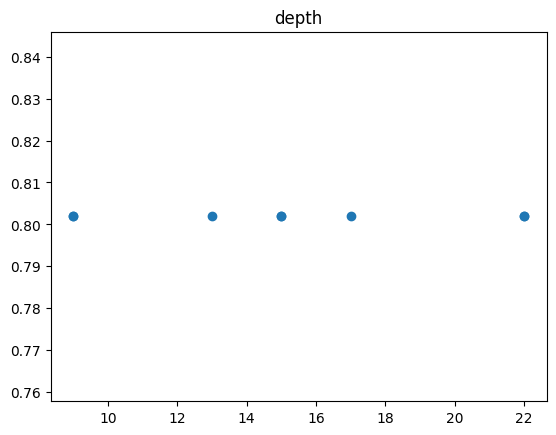

In [ ]:
plt.scatter([i[1] for i in parameters if i[2] >0.785], [i[2] for i in parameters if i[2] >.785])
plt.title("depth")

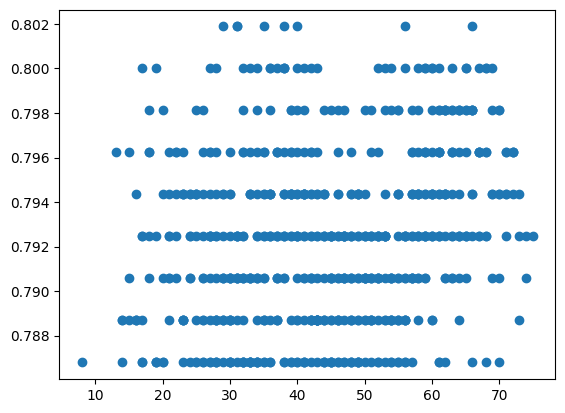

In [ ]:
plt.scatter([i[1] + i[0] for i in parameters if i[2] >0.785], [i[2] for i in parameters if i[2] >0.785])

In [ ]:
[i for i in parameters if i[2] > 0.8]

[(14, 17, 0.8018867924528302),
 (16, 22, 0.8018867924528302),
 (18, 22, 0.8018867924528302),
 (20, 9, 0.8018867924528302),
 (20, 15, 0.8018867924528302),
 (22, 9, 0.8018867924528302),
 (43, 13, 0.8018867924528302),
 (51, 15, 0.8018867924528302)]

In [ ]:
df_params = pd.DataFrame(parameters)


In [ ]:
df_params.to_excel("svyzy.xlsx")

## LogisticRegression

In [ ]:
LR = LogisticRegression(random_state = RANDOM_SEED, max_iter= 1000, tol=1e-5,solver = 'lbfgs' )
LR.fit(design_matrix_train,target_vector_train)
prediction_valid_LR = LR.predict(design_matrix_valid)
accuracy_LR = accuracy_score(prediction_valid_LR, target_vector_valid)

In [ ]:
print(f"Logistic Regression: {accuracy_LR}")
print(f"Random Forest: {best_accuracy_RF}")
print(f"Decision Tree: {best_accuracy_DT}")

Logistic Regression: 0.7226415094339622
Random Forest: 0.7622641509433963
Decision Tree: 0.7849056603773585


## Вывод 

Основываясь на показателе точности, можно  прийти к выводу, что наиболее качественные результаты прогнозирует Random Forest

# Проверьте модель на тестовой выборке

In [ ]:
prediction_test_LR = LR.predict(design_matrix_test)
prediction_test_RF = best_RF.predict(design_matrix_test)
prediction_test_DT = best_DT.predict(design_matrix_test)

In [ ]:
custom_rf = RandomForestClassifier(random_state = RANDOM_SEED,n_estimators = 14, max_depth = 17)
custom_rf.fit(design_matrix_train,target_vector_train)
prediction = custom_rf.predict(design_matrix_test)
accuracy_score(prediction, target_vector_test)


0.807909604519774

In [ ]:
accuracy_LR_test = accuracy_score(prediction_test_LR, target_vector_test)
accuracy_RF_test = accuracy_score(prediction_test_RF, target_vector_test)
accuracy_DT_test = accuracy_score(prediction_test_DT, target_vector_test)

In [ ]:
print(f"Logistic Regression: {accuracy_LR_test}")
print(f"Random Forest: {accuracy_RF_test}")
print(f"Decision Tree: {accuracy_DT_test}")

Logistic Regression: 0.7608286252354048
Random Forest: 0.7984934086629002
Decision Tree: 0.7796610169491526


## Вывод

Наиболее адекватные предсказания делает Random Forest, это видно по точности предсказания на валидационной и на тестовой выборке
